In [128]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import sys

import scipy.stats as stats
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

In [2]:
sys.path.append('../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, simpson38
from ExternalFunctions import nice_string_output, add_text_to_ax 

In [4]:
COLOUR = ['#1E90FF', # 0 # Dodgerblue
          '#FFBF00', # 1 # Amber
          '#FF6347', # 2 # Tomato
          '#00A86B', # 3 # Jade
          '#8A2BE2', # 4 # Blueviolet
          '#FF6FFF', # 5 # Ultra Pink
          '#00CCFF', # 6 # Vivid Sky Blue
          '#FFD800', # 7 # School Bus Yellow
          '#FF004F', # 8 # Folly
          '#0063A6', # 9 # Lapis Lazuli
        ]
def setMplParam(classNum):
    # Define effective colors, line styles, and markers based on the class number
   
    LINE = ['-', '-.', '--', '-.', ':','--','-.','-', ':', '--']
    MARKER = ['.','*', '^', 's', '.', 'p', 'o', 's', '.', 'd']
    COLOUR_EFF = COLOUR[:classNum]
    LINE_EFF = LINE[:classNum]
    MARKER_EFF = MARKER[:classNum]

    # Set the color cycle for lines including color, line style, and marker
    plt.rcParams['axes.prop_cycle'] = (plt.cycler(color=COLOUR_EFF) +
                                       plt.cycler(linestyle=LINE_EFF)+
                                       plt.cycler(marker=MARKER_EFF))

    # Set default line and marker sizes
    plt.rcParams['lines.markersize'] = 3  # Example size
    plt.rcParams['lines.linewidth'] = 2   # Example width for lines

    # Set label and title sizes
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20

    # Set tick properties
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.labelsize'] = 20

    # Set legend font size
    plt.rcParams['legend.fontsize'] = 12

    # Enable and configure grid
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.8
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 1

    # Set axes line width
    plt.rcParams['axes.linewidth'] = 2

    # Set tick sizes and widths
    plt.rcParams['xtick.major.size'] = 7
    plt.rcParams['xtick.major.width'] = 3
    plt.rcParams['xtick.minor.size'] = 2
    plt.rcParams['xtick.minor.width'] = 2

    plt.rcParams['ytick.major.size'] = 7
    plt.rcParams['ytick.major.width'] = 3
    plt.rcParams['ytick.minor.size'] = 2
    plt.rcParams['ytick.minor.width'] = 2

setMplParam(10)


In [70]:
def fixedLengthHyperCubeKDE():
    boxHalfWidth = 1.5
    height = 1/2/boxHalfWidth
    print(boxHalfWidth)
    x_step = 0.001
    x_axis = np.arange(0, 25, x_step)
    data = np.array([1, 2, 5, 6, 12, 15, 16, 16, 22, 22, 22, 23])
    y_axis = np.zeros_like(x_axis)
    
    for point in data:
        lower = point - boxHalfWidth
        upper = point + boxHalfWidth
        y_axis[(x_axis >= lower) & (x_axis <= upper)] += height
    y_axis /= len(data)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x_axis, y_axis)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    print('y value at x = 6 : ', y_axis[int(6/x_step)])
    print('y value at x = 10.1 : ', y_axis[int(10.1/x_step)])
    print('y value at x = 20.499 : ', y_axis[int(20.499/x_step)])
    print('y value at x = 20.501 : ', y_axis[int(20.501/x_step)])

    

1.5
y value at x = 6 :  0.05555555555555555
y value at x = 10.1 :  0.0
y value at x = 20.499 :  0.0
y value at x = 20.501 :  0.08333333333333333


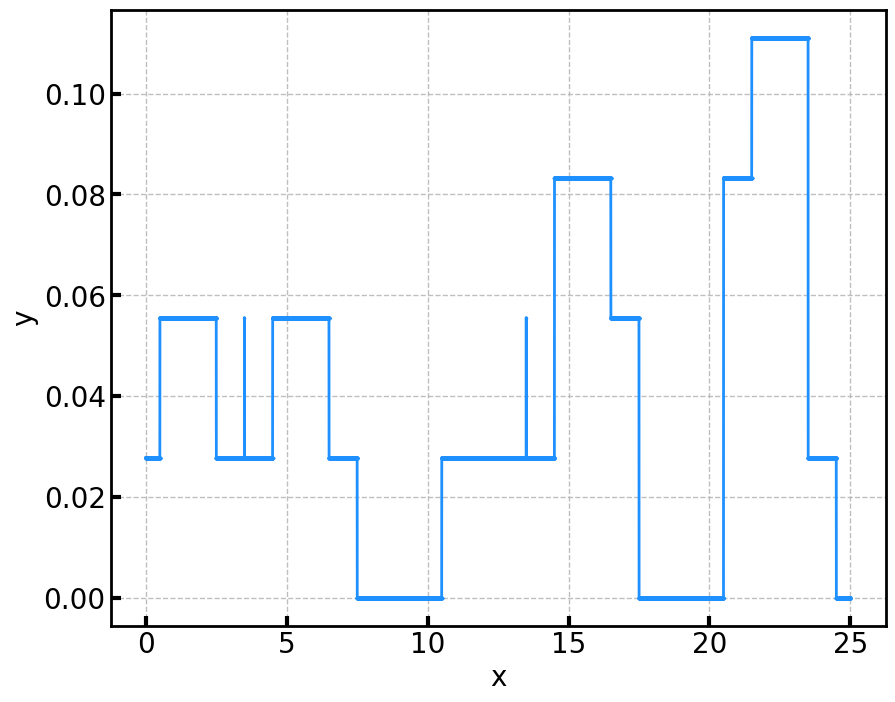

In [71]:
fixedLengthHyperCubeKDE()

In [69]:
def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi) / sigma * np.exp(-(x-mu)**2/2/sigma**2)

7.858116822750856
---------------custom-------------------
y value at x = 6 :  0.030592248162231574
y value at x = 10.1 :  0.02257435242061095
y value at x = 20.499 :  0.04662754739700865
y value at x = 20.501 :  0.046631580687783926
---------------scipi-------------------
y value at x = 6 :  [0.03059225]
y value at x = 10.1 :  [0.02257435]
y value at x = 20.499 :  [0.04662755]
y value at x = 20.501 :  [0.04663158]


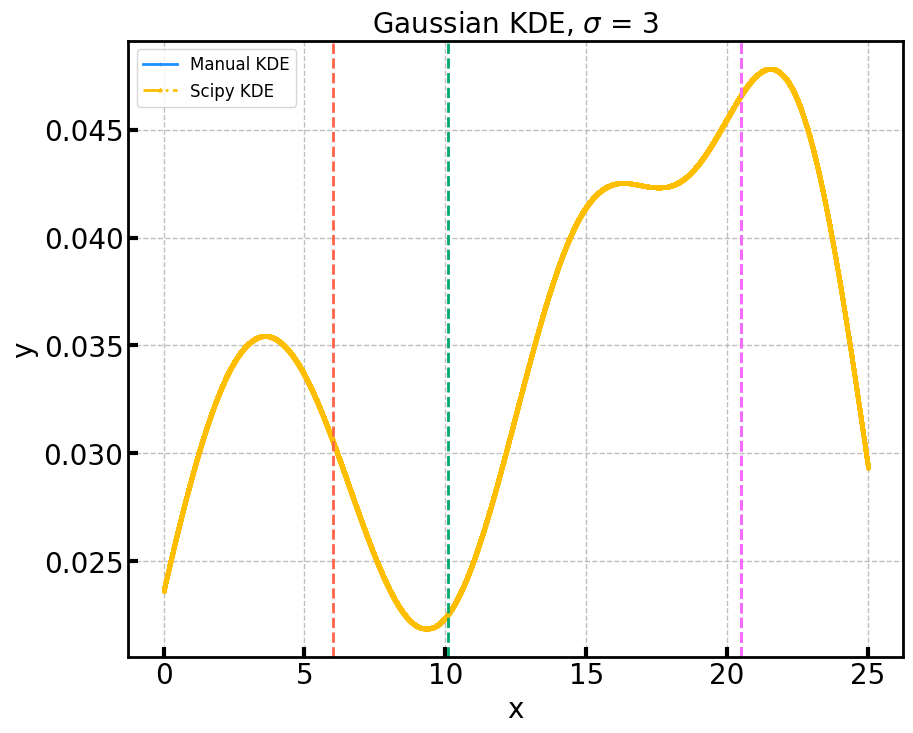

In [140]:
def gaussianKDE():
    fig, ax = plt.subplots(figsize=(10, 8))
    data = np.array([1, 2, 5, 6, 12, 15, 16, 16, 22, 22, 22, 23])
    print(np.std(data))  # 7.8 - >3
    sigma = 3

    x_step = 0.001
    x_axis = np.arange(0, 25, x_step)
    y_axis = np.zeros_like(x_axis)
    
    kde = gaussian_kde(data, bw_method=sigma/np.std(data, ddof=1))
    y_axis_scipy = kde(x_axis)

    for point in data:
        y_axis += gaussian(x_axis, point, sigma)
        # ax.plot(x_axis, gaussian(x_axis, point, sigma), color=COLOUR[8], alpha=0.5, marker='.', linestyle='-', lw = 2)
        
    y_axis /= len(data)
    x_values = [6, 10.1, 20.499, 20.501]
    
    ax.plot(x_axis, y_axis, label='Manual KDE')
    ax.plot(x_axis, y_axis_scipy, label='Scipy KDE')
    for i, x in enumerate(x_values):
        ax.axvline(x, color=COLOUR[i+2 % len(COLOUR)], linestyle='--')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Gaussian KDE, $\sigma$ = {sigma}')
    ax.legend()

    print('---------------custom-------------------')
    print('y value at x = 6 : ', y_axis[int(6/x_step)])
    print('y value at x = 10.1 : ', y_axis[int(10.1/x_step)])
    print('y value at x = 20.499 : ', y_axis[int(20.499/x_step)])
    print('y value at x = 20.501 : ', y_axis[int(20.501/x_step)])

    print('---------------scipi-------------------')
    for x in x_values:
        print(f'y value at x = {x} : ', kde(x))

gaussianKDE()

---------------scipi-------------------
y value at x = 6 :  0.030592248162231574
y value at x = 10.1 :  0.02257435242061095
y value at x = 20.499 :  0.04662754739700865
y value at x = 20.501 :  0.046631580687783926
---------------scipi-------------------
y value at x = 6 :  [0.02852402]
y value at x = 10.1 :  [0.03009156]
y value at x = 20.499 :  [0.03919545]
y value at x = 20.501 :  [0.03919286]


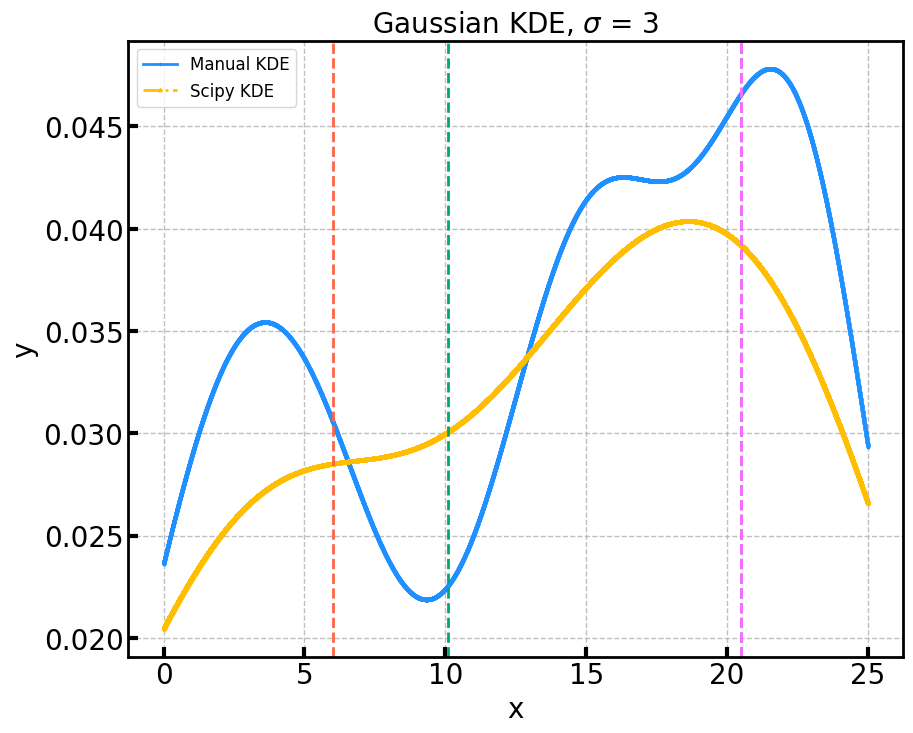

In [123]:
def epanechnikov(x, mu):
    result = 3/4 * (1 - ((x - mu))**2)
    result[result < 0] = 0
    return result


In [129]:
def epanechnikovKDE():
    fig, ax = plt.subplots(figsize = (10, 8))
    data = np.array([1, 2, 5, 6, 12, 15, 16, 16, 22, 22, 22, 23])
    sigma = 3

    x_step = 0.001
    x_axis = np.arange(0, 25, x_step)
    y_axis = np.zeros_like(x_axis)
    kde = KernelDensity(kernel='epanechnikov', bandwidth=3.0)
    kde.fit(data)
    log_dens = kde.score_samples(x_axis)  # Compute the log density model on the data
    y_axis_sklearn = np.exp(log_dens)

    for point in data:
        y_axis += epanechnikov(x_axis, point)
        
    y_axis /= len(data)
    x_values = [6, 10.1, 20.499, 20.501]
    
    ax.plot(x_axis, y_axis, label='Manual KDE')
    ax.plot(x_axis, y_axis_sklearn, label='sklearn KDE')
    # ax.plot(x_axis, y_axis_scipy, label='Scipy KDE')
    for i, x in enumerate(x_values):
        ax.axvline(x, color=COLOUR[i+2 % len(COLOUR)], linestyle='--')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'EpanechnikovKDE KDE, $\sigma$ = {sigma}')
    ax.legend()

    print('----------------------------------')
    print('y value at x = 6 : ', y_axis[int(6/x_step)])
    print('y value at x = 10.1 : ', y_axis[int(10.1/x_step)])
    print('y value at x = 20.499 : ', y_axis[int(20.499/x_step)])
    print('y value at x = 20.501 : ', y_axis[int(20.501/x_step)])

    

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  2.  5.  6. 12. 15. 16. 16. 22. 22. 22. 23.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

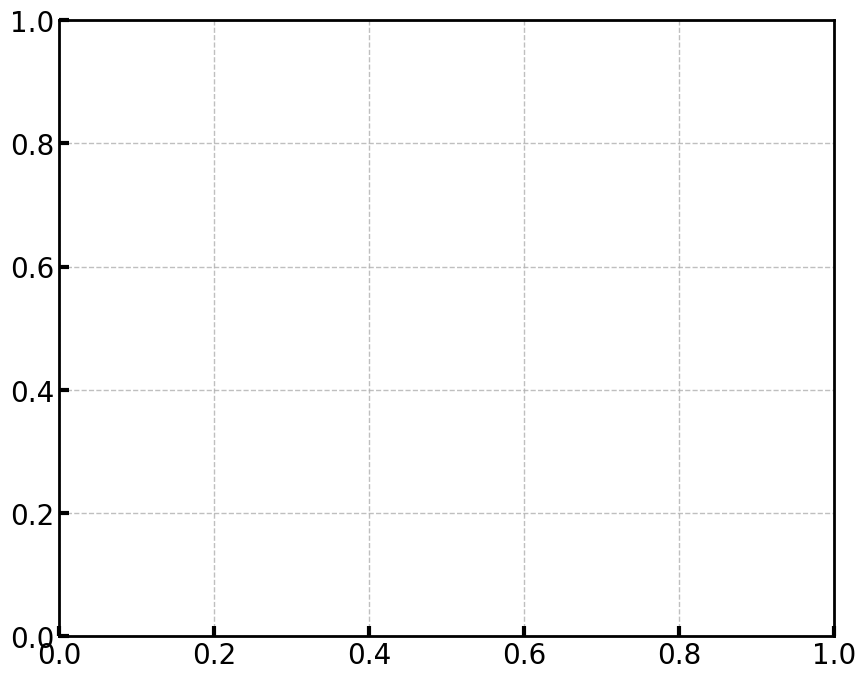

In [130]:
epanechnikovKDE()